# Popular Data Science Questions

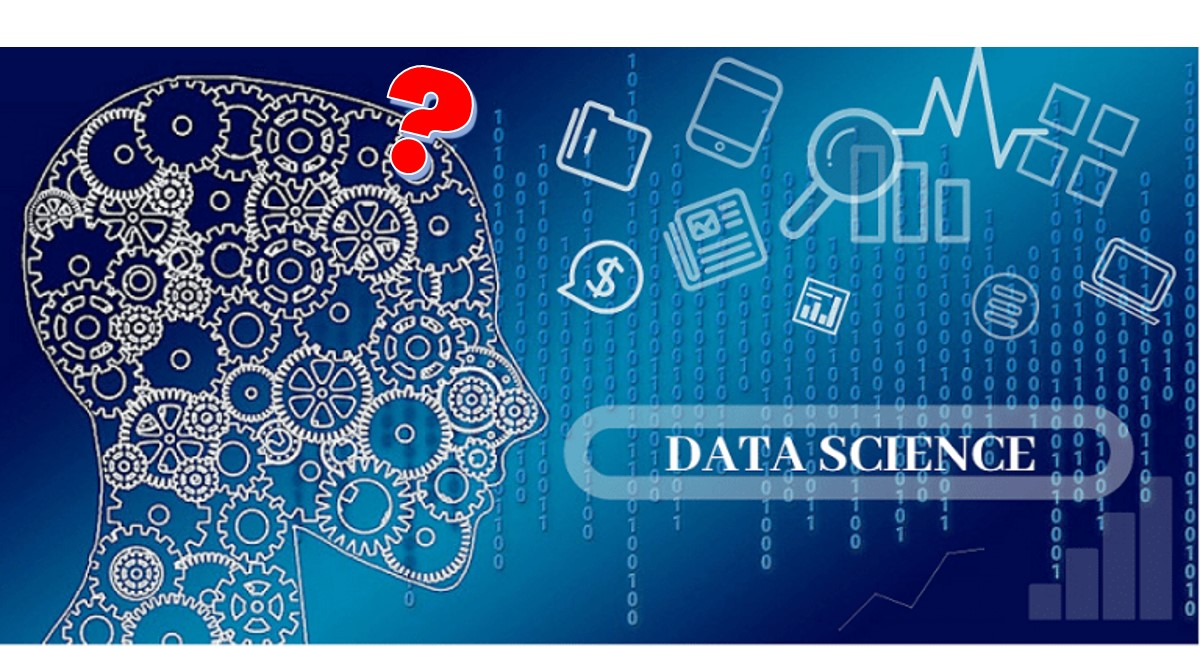

## Introduction

**Stack Exchange** is a network of question-and-answer (Q&A) websites on topics in diverse fields, each site covering a specific topic, where questions, answers, and users are subject to a reputation award process. The reputation system allows the sites to be self-moderating.

Stack Exchange currently hosts 176 communities that are created and run by experts and enthusiasts who are passionate about a specific topic. They build libraries of high-quality questions and answers, focused on each community's area of expertise. Here are just a few of the communities shown below. The size of 'icon' relates to the magnitude of community usage. **Of all 176 communities, DATA SCIENCE only ranks 46th in terms of usage.**

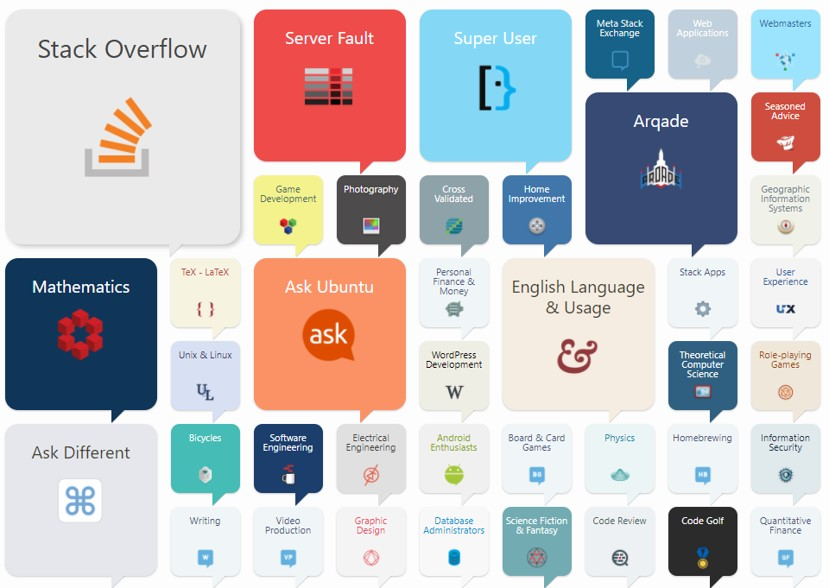


There's an incredible broad spectrum of subject matters to ask questions about across the 176 communities; covering Technology, Culture/Recreation, Life/Arts, Science, Professional and Business.

Clear boundaries are set regarding **question format:**

**<span style="color:green">Ask about ...</span>**

- Specific issues within each site's area of expertise
- Real problems or questions that you’ve encountered

**<span style="color:red">Don't ask about ...</span>**

- Questions that are primarily opinion-based
- Questions with too many possible answers or that would require an extremely long answer

**"Tags"** are used to make it easy to find interesting questions. All questions are tagged with their subject areas. Each can have up to 5 tags, since a question might be related to several subjects.

## Project Objective

Although the title of this guided project is; 'Popular Data Science Questions', the raw data provided does not enable me to identify the most frequent questions. What the raw data provides is Data Science TAG TYPES, not actual questions posed by users.

What I can reveal through data analysis is top Data Science tag types and tag usage on a monthly basis over a period of time and a few other interesting things. 

**At the end of this report**, I will list the current top 10 Data Science questions (across all Tag types) as of May 25 2021 by extracting them from the appropriate data site. I will provide a link to where I obtained the information.

### Example Data Science Tags and Questions

Here are a few example "Tags" available within the Data Science Community:

- machine-learning
- python
- deep-learning
- scikit-learn
- neural-network

Here are a few top post questions:

- What are graph embedding?
- One Hot Encoding vs Word Embedding - When to choose one or another?
- What is Hellinger Distance and when to use it?
- Can machine learning learn a function like finding maximum from a list?



## Query 1 in Data Science Stack Exchange Data Explorer


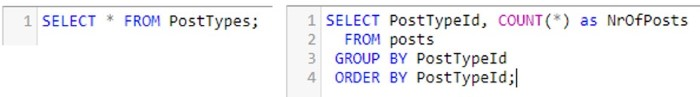

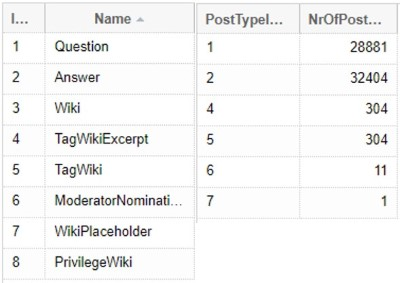

## Observations

The two separate SQL 'SELECT' commands shown above generated the two subsequent tables.

The first table on the left shows the different types of posts available within Data Science Stack Exchange. The table on the right shows the quantity of posts for each type of post.

The top two post types are Answer (32404) and Question (28881). It makes sense to me that there are more Answer posts since answers from different users may be provided for a single question.

## Query 2 in Data Science Stack Exchange Data Explorer

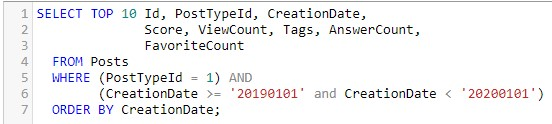

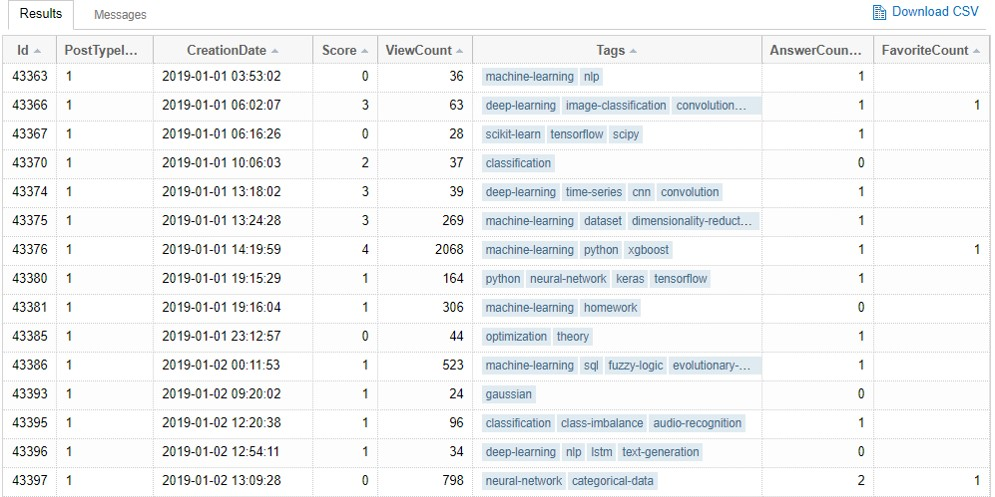

## Observations

The table above shows the type of information contained within the 'Posts' table. The information under the 'Tags' column shows that there are times when a question has multiple 'Tags' it can be classified under.

Later in this project we will observe the frequency of tag types and summarize the top 20. Tag types doesn't provide us the exact questions posed but they can give us an idea of the subject matter questions were related to.

## Read Data File

In [1]:
# perform all appropriate import 'libraries' to ensure
# executability of various commands.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data file provided for analysis.
questions = pd.read_csv('2019_questions.csv', na_values=['Not Stated'])

# print column headings and file info to get a feel for
# the data file content and structure.
print(questions.columns, '\n')
print(questions.info(), '\n')
print(questions.isna().sum(), '\n')
print(questions.head())

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'Tags', 'AnswerCount',
       'FavoriteCount'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB
None 

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64 

      Id         CreationDate  Score  ViewCount  \
0  44419  2019-01-23 09:21:13      1         21   
1  44420  2019-01-23 09:34:01    

## Observations

1. The only column that has missing values is 'FavoriteCount'. There are 7432 missing values out of 8839 rows. We may convert 'NaN' to 0 if need be to answer specific questions.
2. In the 'Tags' column there are multiple Tag categories separated by '<' '>' characters. Whether anything specific needs to be done with this column depends on the type of questions that need to be answered.

In [2]:
# convert 'FavoriteCount' column from float64 to int64.
questions['FavoriteCount'] = questions['FavoriteCount'].fillna(0).astype(np.int64)

# convert CreationDate from object to datetime64.
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])

# confirm successful conversions.
print(questions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB
None


In [3]:
# replace tag separators '><' with commas and
# remove '<' and '>' from beginning and end of Tags.
# this creates lists within Tags column.

questions['Tags'] = questions['Tags'].str.replace('><',',')
questions['Tags'] = questions['Tags'].str.replace('<','')
questions['Tags'] = questions['Tags'].str.replace('>','')

# confirm successful executions.
print(questions.head())

      Id        CreationDate  Score  ViewCount  \
0  44419 2019-01-23 09:21:13      1         21   
1  44420 2019-01-23 09:34:01      0         25   
2  44423 2019-01-23 09:58:41      2       1651   
3  44427 2019-01-23 10:57:09      0         55   
4  44428 2019-01-23 11:02:15      0         19   

                                                Tags  AnswerCount  \
0                       machine-learning,data-mining            0   
1  machine-learning,regression,linear-regression,...            0   
2            python,time-series,forecast,forecasting            0   
3                  machine-learning,scikit-learn,pca            1   
4                dataset,bigdata,data,speech-to-text            0   

   FavoriteCount  
0              0  
1              0  
2              0  
3              0  
4              0  


In [4]:
# use the 'explode' code to transform each element of the list-structure
# in Tags column confining tags to single value under same column name.
new = questions.assign(Tags=questions['Tags'].str.split(',')).explode('Tags')
print(new.info(), '\n')

# count quantity of times each tag type was used
# and limit output to top 20.
print('\033[1mTop 20 Data Science Tags in 2019  \033[0m')
new.Tags.value_counts().nlargest(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26640 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             26640 non-null  int64         
 1   CreationDate   26640 non-null  datetime64[ns]
 2   Score          26640 non-null  int64         
 3   ViewCount      26640 non-null  int64         
 4   Tags           26640 non-null  object        
 5   AnswerCount    26640 non-null  int64         
 6   FavoriteCount  26640 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.6+ MB
None 

Top 20 Data Science Tags in 2019  


machine-learning          2693
python                    1814
deep-learning             1220
neural-network            1055
keras                      935
classification             685
tensorflow                 584
scikit-learn               540
nlp                        493
cnn                        489
time-series                466
lstm                       402
pandas                     354
regression                 347
dataset                    340
r                          268
predictive-modeling        265
clustering                 257
statistics                 234
machine-learning-model     224
Name: Tags, dtype: int64

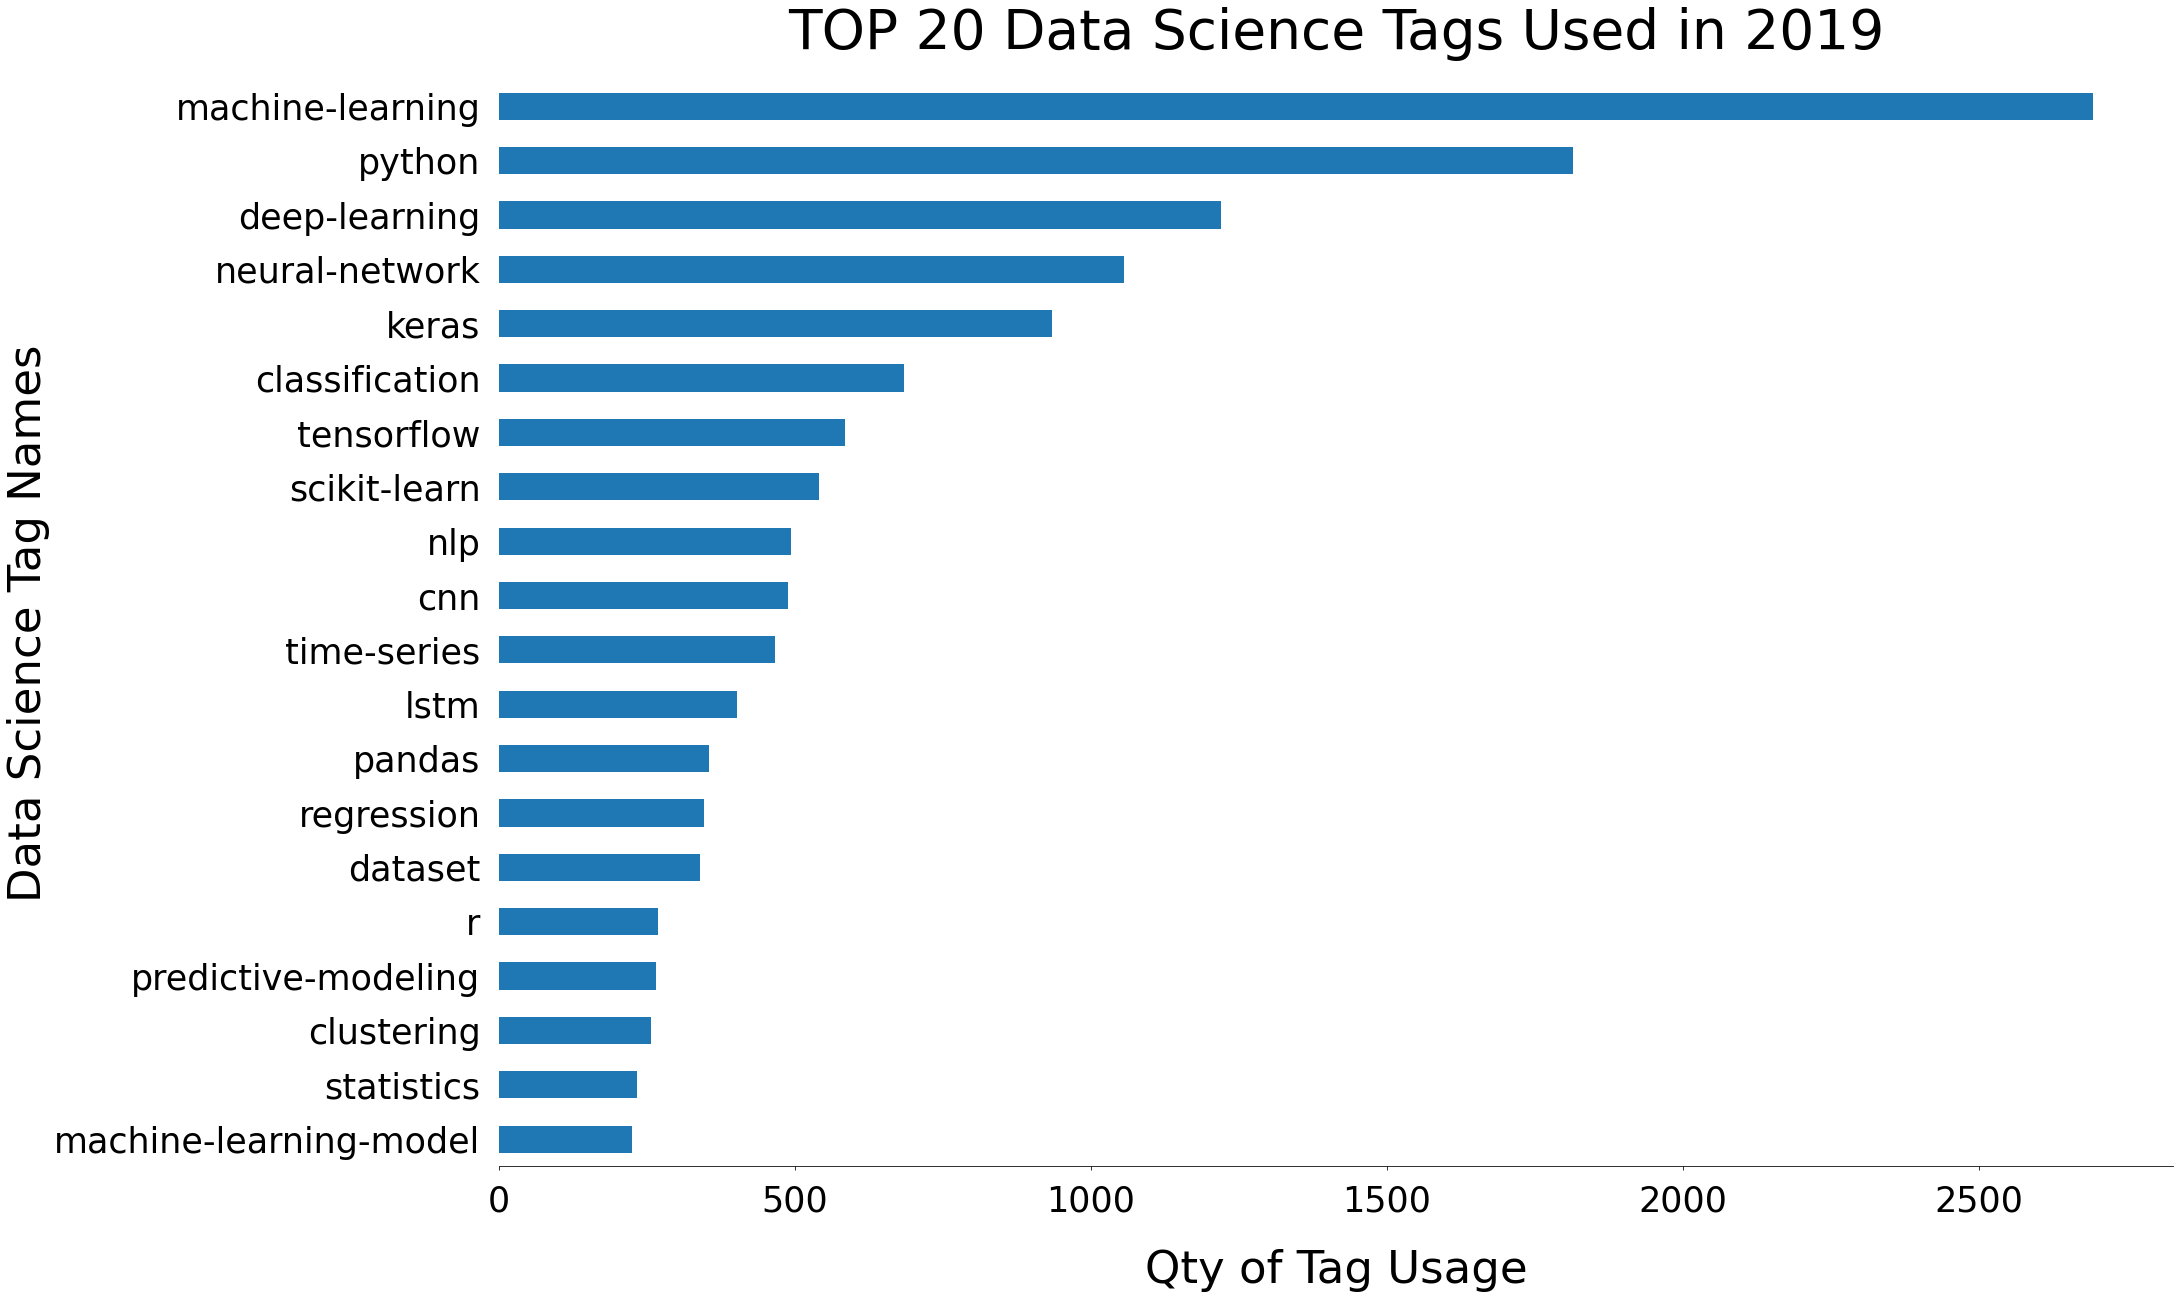

In [5]:
# plot a horizontal bar chart to provide visualization
# of top 20 Data Science tags used in 2019.
print('\n')
fig, ax = plt.subplots(figsize=(30,20))

new['Tags'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('TOP 20 Data Science Tags Used in 2019', fontsize=55, pad = 30)
plt.xlabel('Qty of Tag Usage', fontsize=45, labelpad = 30)
plt.xticks(fontsize=35, rotation=0)
plt.ylabel('Data Science Tag Names', fontsize=45)
plt.yticks(fontsize=35)
sns.despine(bottom=False, left=True)
ax.grid(False)
ax.tick_params(bottom=True, left=False, pad=15)
plt.show()

## Data Science Stack Exchange Tags

The bar plot above shows the top 20 Data Science tags used in 2019.

One good question is; "Are these tags totally independent of each other or is there some inter-relationship between any of them?"

Well, there is a devoted section within the Data Science Stack Exchange web site under the title 'Tags' that provides a brief description of each 'Tag' as shown below. The 'Tag' captions below not only provide a description but also are ordered from highest usage to least regarding the **current top 20 as of May 25 2021**. They are very close to the top 20 of 2019 as shown in the above graph.

Regarding 'Tag' descriptions, there is definitely inter-relationship between various tags. For example, there are sub-categories of 'machine-learning' such as: 'deep-learning', 'scikit-learn', tensorflow' and so on.

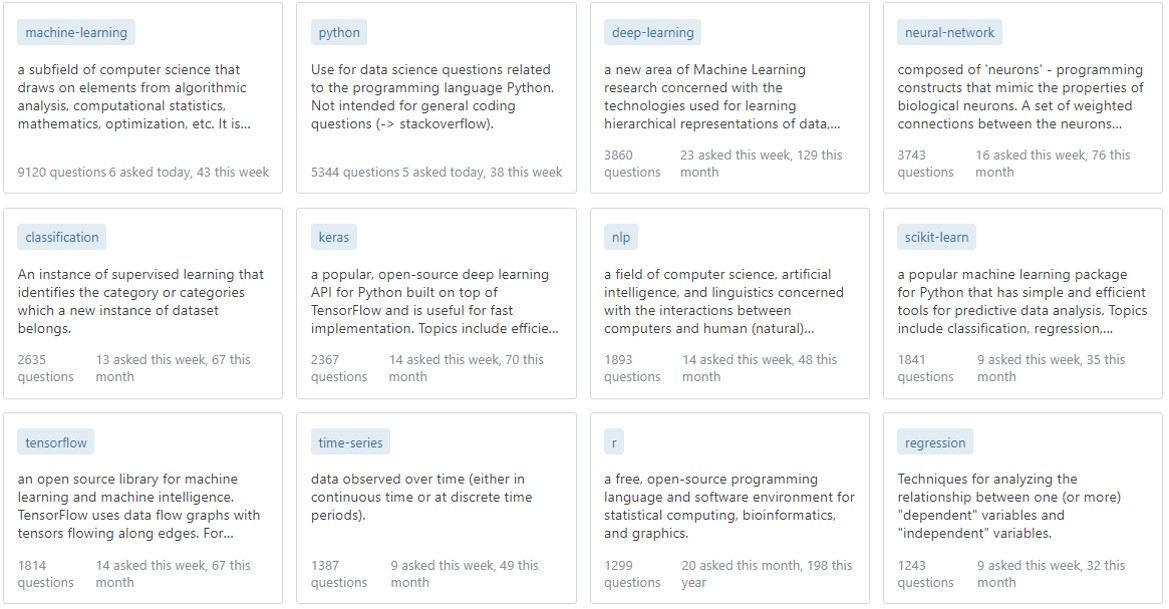

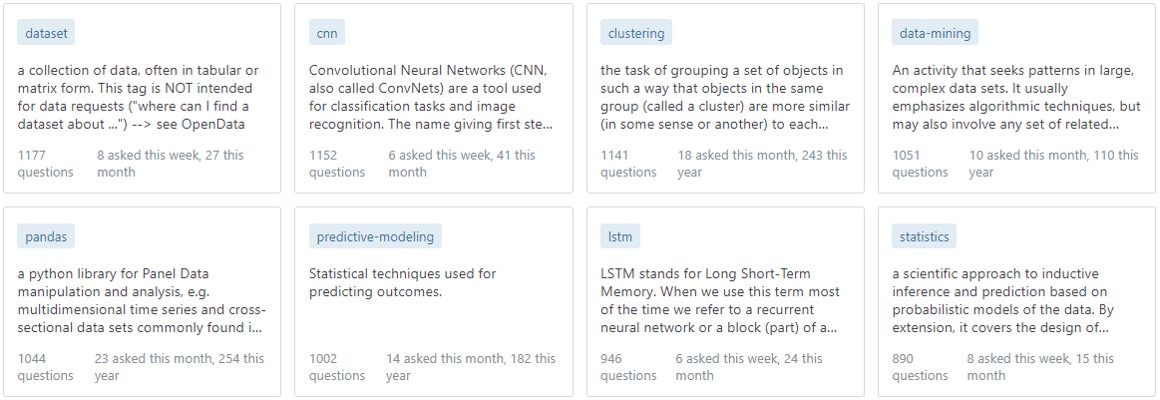

In [6]:
# read data file that provides data from mid 2014 to end of 2019.
all_questions = pd.read_csv('all_questions.csv', na_values=['Not Stated'])

# observe the data file content and structure.
print(all_questions.info(), '\n')
print(all_questions.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21576 non-null  int64 
 1   CreationDate  21576 non-null  object
 2   Tags          21576 non-null  object
dtypes: int64(1), object(2)
memory usage: 505.8+ KB
None 

      Id         CreationDate  \
0  45416  2019-02-12 00:36:29   
1  45418  2019-02-12 00:50:39   
2  45422  2019-02-12 04:40:51   
3  45426  2019-02-12 04:51:49   
4  45427  2019-02-12 05:08:24   

                                                Tags  
0      <python><keras><tensorflow><cnn><probability>  
1                                   <neural-network>  
2                      <python><ibm-watson><chatbot>  
3                                            <keras>  
4  <r><predictive-modeling><machine-learning-mode...  


In [7]:
# convert CreationDate from object to datetime64.
all_questions['CreationDate'] = pd.to_datetime(all_questions['CreationDate'])

# replace tag separators '><' with commas
# and remove '<' and '>' from beginning and end of Tags.
# this creates lists within Tags column.
all_questions['Tags'] = all_questions['Tags'].str.replace('><',',')
all_questions['Tags'] = all_questions['Tags'].str.replace('<','')
all_questions['Tags'] = all_questions['Tags'].str.replace('>','')

print(all_questions.head(),'\n')
print(all_questions.info())

      Id        CreationDate  \
0  45416 2019-02-12 00:36:29   
1  45418 2019-02-12 00:50:39   
2  45422 2019-02-12 04:40:51   
3  45426 2019-02-12 04:51:49   
4  45427 2019-02-12 05:08:24   

                                                Tags  
0            python,keras,tensorflow,cnn,probability  
1                                     neural-network  
2                          python,ibm-watson,chatbot  
3                                              keras  
4  r,predictive-modeling,machine-learning-model,s...   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            21576 non-null  int64         
 1   CreationDate  21576 non-null  datetime64[ns]
 2   Tags          21576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB
None


In [8]:
# use the 'explode' code to transform each element of the list-structure
# in Tags column confining tags to single value under same column name.
all_new = all_questions.assign(Tags=all_questions['Tags'].str.split(',')).explode('Tags')

print(all_new.info(), '\n')
print(all_new.head(), '\n')

# count quantity of times each Data Science
# tag type was used and limit ouput to top 20.
print('\033[1mTop 20 Data Science Tags from mid 2014 to end of 2019  \033[0m')

all_new.Tags.value_counts().nlargest(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63390 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            63390 non-null  int64         
 1   CreationDate  63390 non-null  datetime64[ns]
 2   Tags          63390 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ MB
None 

      Id        CreationDate         Tags
0  45416 2019-02-12 00:36:29       python
0  45416 2019-02-12 00:36:29        keras
0  45416 2019-02-12 00:36:29   tensorflow
0  45416 2019-02-12 00:36:29          cnn
0  45416 2019-02-12 00:36:29  probability 

Top 20 Data Science Tags from mid 2014 to end of 2019  


machine-learning       6969
python                 3937
neural-network         2939
deep-learning          2805
classification         1899
keras                  1750
scikit-learn           1307
tensorflow             1229
nlp                    1170
r                      1119
time-series            1005
data-mining             947
dataset                 893
regression              869
clustering              846
predictive-modeling     817
cnn                     815
pandas                  736
lstm                    694
statistics              650
Name: Tags, dtype: int64

In [9]:
# determine total range of date period for data.
print(all_new['CreationDate'].min())
print(all_new['CreationDate'].max(), '\n')

all_new['yearmonth'] = all_new.CreationDate.apply(lambda x: x.strftime('%Y%m')).astype(int)
print(all_new['yearmonth'][:10], '\n')

print(all_new.info())

2014-05-13 23:58:30
2020-01-19 03:01:03 

0    201902
0    201902
0    201902
0    201902
0    201902
1    201902
2    201902
2    201902
2    201902
3    201902
Name: yearmonth, dtype: int32 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63390 entries, 0 to 21575
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            63390 non-null  int64         
 1   CreationDate  63390 non-null  datetime64[ns]
 2   Tags          63390 non-null  object        
 3   yearmonth     63390 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.2+ MB
None


In [10]:
# quantify tag usage on a monthly time period basis.
monthly_use = pd.DataFrame({"total_usage": all_new.groupby("yearmonth").size()})
print(monthly_use)

# generate DataFrame by merging two files.
temp = pd.DataFrame({"yearmonth": all_new["yearmonth"]})
temp = pd.merge(temp, monthly_use, 'left', left_on='yearmonth', right_index=True)
temp.fillna(0, inplace=True)
print(temp.head())
print(temp.info())

# convert date format from int32 to datetime64.
temp["yearmonth"]= pd.to_datetime(temp["yearmonth"], format='%Y%m')
print(temp.info())

# remove first month of 2020 as that data may not have included the full month.
all_tags = temp.groupby(['yearmonth','total_usage']).count().reset_index()
all_tags.drop(all_tags[all_tags.yearmonth == '2020-01-01'].index, inplace=True)
print(all_tags.tail(10))
print(all_tags.info())

# print values in year 2017 to determine month that steep slope begins.
mask = (all_tags['yearmonth'] > '2017-01-01') & (all_tags['yearmonth'] <= '2018-01-01')
print(all_tags.loc[mask])


           total_usage
yearmonth             
201405             152
201406             247
201407             183
201408             171
201409             119
...                ...
201909            2139
201910            1936
201911            2102
201912            2237
202001            1384

[69 rows x 1 columns]
   yearmonth  total_usage
0     201902         2133
0     201902         2133
0     201902         2133
0     201902         2133
0     201902         2133
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63390 entries, 0 to 21575
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   yearmonth    63390 non-null  int32
 1   total_usage  63390 non-null  int64
dtypes: int32(1), int64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63390 entries, 0 to 21575
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----     

In [11]:
# select tag type labeled 'deep-learning'.
deep_l = all_new[(all_new['Tags'] == 'deep-learning')]
print(deep_l)

          Id        CreationDate           Tags  yearmonth
14     45442 2019-02-12 11:35:56  deep-learning     201902
28     45467 2019-02-12 21:49:08  deep-learning     201902
29     45469 2019-02-12 22:40:12  deep-learning     201902
55     45515 2019-02-13 15:18:07  deep-learning     201902
63     45530 2019-02-13 18:33:05  deep-learning     201902
...      ...                 ...            ...        ...
21555  36920 2018-08-14 11:39:55  deep-learning     201808
21557  36929 2018-08-14 13:52:16  deep-learning     201808
21558  36939 2018-08-14 18:18:43  deep-learning     201808
21564  36956 2018-08-15 06:48:31  deep-learning     201808
21575  36985 2018-08-15 17:01:29  deep-learning     201808

[2805 rows x 4 columns]


In [12]:
# quantify deep-learning tag usage on a monthly time period basis.
monthly_use = pd.DataFrame({"deepl_usage": deep_l.groupby("yearmonth").size()})
print(monthly_use)

# generate DataFrame by merging two files.
temp2 = pd.DataFrame({"yearmonth": deep_l["yearmonth"]})
temp2 = pd.merge(temp2, monthly_use, 'left', left_on='yearmonth', right_index=True)
temp2.fillna(0, inplace=True)
print(temp2.head())
print(temp2.info())

# convert date format from int32 to datetime64.
temp2["yearmonth"]= pd.to_datetime(temp2["yearmonth"], format='%Y%m')
print(temp2.info())

# remove first month of 2020 as that data may not have included the full month.
deepl_tags = temp2.groupby(['yearmonth','deepl_usage']).count().reset_index()
deepl_tags.drop(deepl_tags[deepl_tags.yearmonth == '2020-01-01'].index, inplace=True)
print(deepl_tags.tail(10))
print(deepl_tags.info())

# print values in year 2017 to determine month that steep slope begins.
mask = (deepl_tags['yearmonth'] > '2017-01-01') & (deepl_tags['yearmonth'] <= '2018-01-01')
print(deepl_tags.loc[mask])

           deepl_usage
yearmonth             
201406               1
201407               1
201410               1
201411               1
201412               4
...                ...
201909              81
201910              67
201911              99
201912             112
202001              67

[64 rows x 1 columns]
    yearmonth  deepl_usage
14     201902           89
28     201902           89
29     201902           89
55     201902           89
63     201902           89
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 14 to 21575
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   yearmonth    2805 non-null   int32
 1   deepl_usage  2805 non-null   int64
dtypes: int32(1), int64(1)
memory usage: 54.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 14 to 21575
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  ---

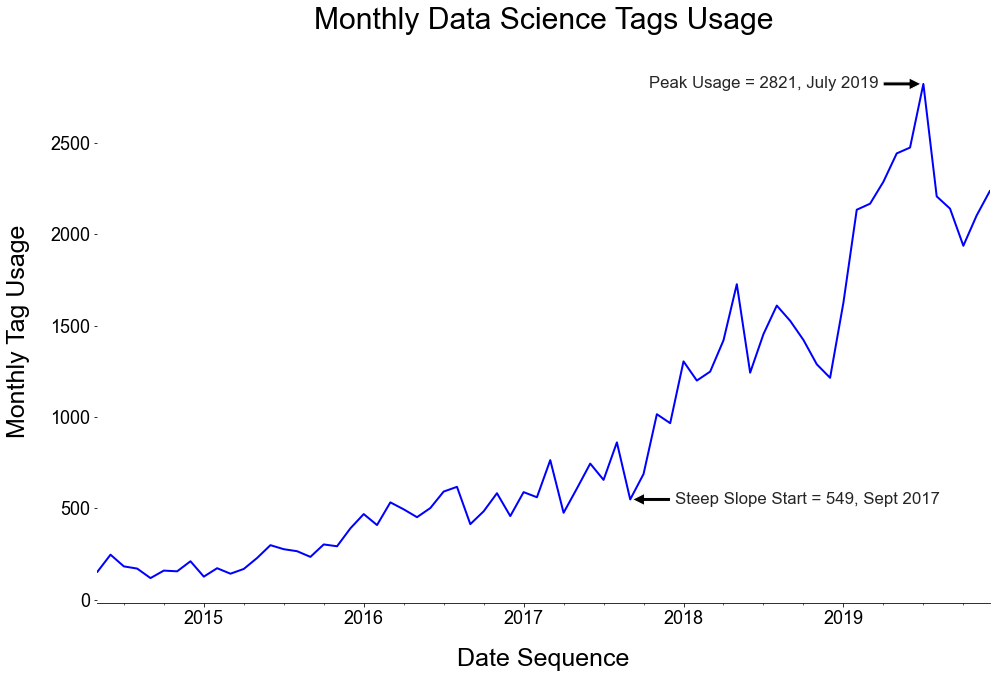

In [13]:
print('\n')

# generate line graph that tracks Data Science monthly tag usage.
fig, ax = plt.subplots(figsize=(30,20))
sns.set(font_scale=1.4)
all_tags.set_index('yearmonth')['total_usage'].plot(figsize=(16, 10), linewidth=2, color='blue')
plt.title('Monthly Data Science Tags Usage', fontsize=30, pad = 30)
plt.xlabel('Date Sequence', fontsize=25, labelpad = 20)
plt.xticks(fontsize=18, rotation=0)
plt.ylabel('Monthly Tag Usage', fontsize=25, labelpad = 20)
plt.yticks(fontsize=18)
sns.despine(bottom=False, left=True)
ax.grid(False)
ax.tick_params(bottom=True, left=True)

# identify peak monthly tag usage.
y1 = 2821
x1 = '2019-07-01'
plt.annotate("Peak Usage = 2821, July 2019", (x1, y1),
             xytext=(-45, 0), textcoords='offset points',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='right', verticalalignment='center')

# identify start of steep slope for monthly tag usage.
y2 = 549
x2 = '2017-09-01'
plt.annotate("Steep Slope Start = 549, Sept 2017", (x2, y2),
             xytext=(45, 0), textcoords='offset points',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='center')
plt.show()

## Observations

Notice on the line graph above that the upward trend in monthly tag usage is not linear. The curve slope increases significantly from September 2017 and peaks out at July 2019. There are so many possible factors that could have contributed to the significant increase of questions being posed between Sept 2017 and July 2019 in Data Science Stack Exchange.

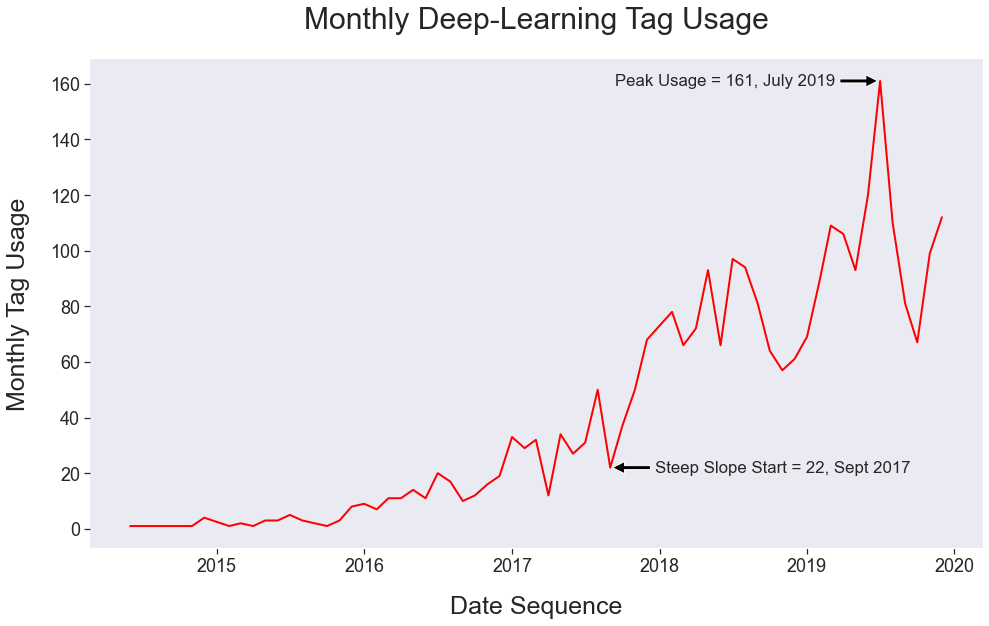

In [14]:
print('\n')
fig, ax = plt.subplots(figsize=(30,20))

# generate line graph that tracks deep-learning monthly tag usage.
sns.set(font_scale=1.4)
deepl_tags.set_index('yearmonth')['deepl_usage'].plot(figsize=(16, 10), linewidth=2, color='red')
plt.title('Monthly Deep-Learning Tag Usage', fontsize=30, pad = 30)
plt.xlabel('Date Sequence', fontsize=25, labelpad = 20)
plt.xticks(fontsize=18, ha='center', rotation=0)
plt.ylabel('Monthly Tag Usage', fontsize=25, labelpad = 20)
plt.yticks(fontsize=18)
sns.despine(bottom=False, left=True)
ax.grid(False)
ax.tick_params(bottom=True, left=True)

# identify peak monthly tag usage.
y1 = 161
x1 = '2019-07-01'
plt.annotate("Peak Usage = 161, July 2019", (x1, y1),
             xytext=(-45, 0), textcoords='offset points',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='right', verticalalignment='center')

# identify start of steep slope for monthly tag usage.
y2 = 22
x2 = '2017-09-01'
plt.annotate("Steep Slope Start = 22, Sept 2017", (x2, y2),
             xytext=(45, 0), textcoords='offset points',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='center')
plt.show()

## Observations

Looking at the line graph above, the monthly usage trend for deep-learning tags is much the same as tags for all Data Science questions. The curve slope increases significantly from September 2017 and peaks out at July 2019.

**Since the line graphs for Data Science monthly tag usage across all tags is very close in appearance to the line graph for monthly usage of 'deep-learning' tags, let's check for relationship between the two.**

In [15]:
# join Data Science tag data with Deep-Learning tag data as a DataFrame
# in order to perform correlation test between the two datasets.

merged_data = pd.merge(all_tags, deepl_tags, how='outer', on = 'yearmonth')
print(merged_data)

# there are some missing values in deep-learning dataset.
# remove the rows with missing values in order to run a correlation test.
merged_data = merged_data.dropna(axis=0, subset=['deepl_usage'])
print(merged_data)

    yearmonth  total_usage  deepl_usage
0  2014-05-01          152          NaN
1  2014-06-01          247          1.0
2  2014-07-01          183          1.0
3  2014-08-01          171          NaN
4  2014-09-01          119          NaN
..        ...          ...          ...
63 2019-08-01         2206        110.0
64 2019-09-01         2139         81.0
65 2019-10-01         1936         67.0
66 2019-11-01         2102         99.0
67 2019-12-01         2237        112.0

[68 rows x 3 columns]
    yearmonth  total_usage  deepl_usage
1  2014-06-01          247          1.0
2  2014-07-01          183          1.0
5  2014-10-01          160          1.0
6  2014-11-01          156          1.0
7  2014-12-01          211          4.0
..        ...          ...          ...
63 2019-08-01         2206        110.0
64 2019-09-01         2139         81.0
65 2019-10-01         1936         67.0
66 2019-11-01         2102         99.0
67 2019-12-01         2237        112.0

[63 rows x 3 col



best fit line:
y = -7.67 + 0.05x


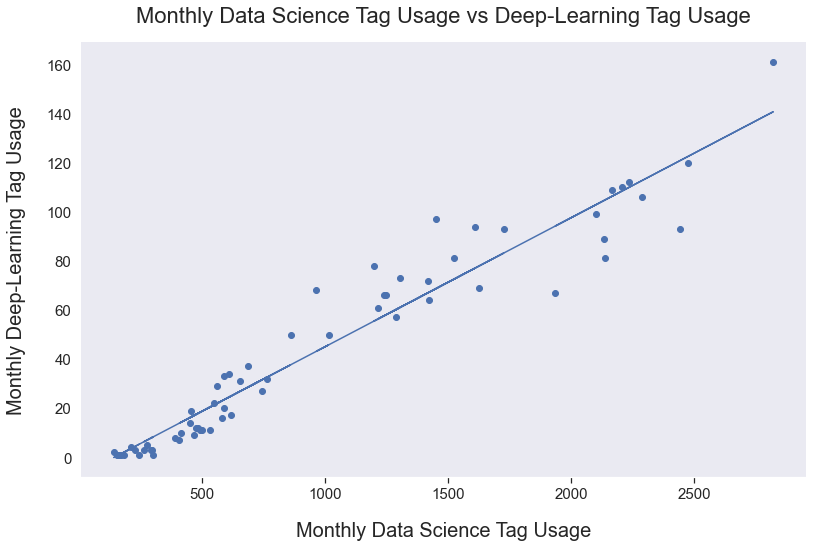

stat=0.966, p=0.000 

Reject Null Hypothesis that there is No Relationship. 

Strength of Relationship = 93.3% !  


In [16]:
# define x and y for line of best fit computation.
X = merged_data["total_usage"]
Y = merged_data["deepl_usage"]

# solve for a and b
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    
    print('\n')
    print("best fit line:\ny = {:.2f} + {:.2f}x".format(a, b))

    return a, b

# best fit line solution
a, b = best_fit(X, Y)

# plot points and fit line
fig, ax = plt.subplots(figsize=(13,8))
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
plt.title('Monthly Data Science Tag Usage vs Deep-Learning Tag Usage', fontsize=22, pad = 20)
plt.xlabel('Monthly Data Science Tag Usage', fontsize=20, labelpad = 20)
plt.xticks(fontsize=15, rotation=0)
plt.ylabel('Monthly Deep-Learning Tag Usage', fontsize=20, labelpad=20)
plt.yticks(fontsize=15)
sns.despine(bottom=False, left=True)
ax.grid(False)
ax.tick_params(bottom=True, left=False)
plt.show()

# perform the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = merged_data["total_usage"]
data2 = merged_data["deepl_usage"]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p), '\n')
if p > 0.05:
	print("Probably independent")
else:
	print("Reject Null Hypothesis that there is No Relationship.", '\n')
print('\033[1mStrength of Relationship = 93.3% !  \033[0m')

## Observations

**<span style="color:blue">The strength of relationship for the two categories above is extremely high: 93.3% !</span>**

I think that makes sense since 'deep-learning' is simply a sub-category of Data Science.

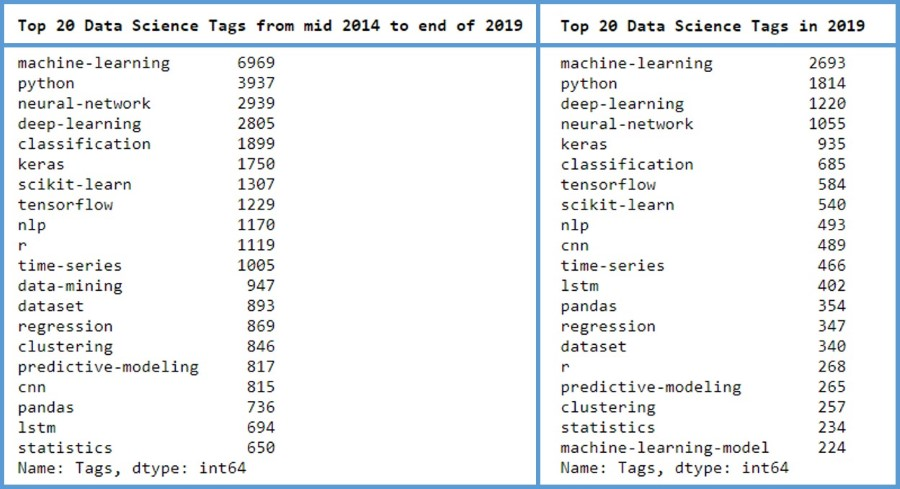

# Conclusion

The most common Data Science Tag type used as per the raw data provided is 'machine-learning' as shown above. There are many different questions that can be posed by users which come under the tag definition 'machine-learning' as shown below. Machine-Learning is not a question unto itself, but is a category under which questions that relate to it fall under.

**<span style="color:blue">MACHINE LEARNING DEFINITION:</span>** Machine Learning is a subfield of computer science that draws on elements from algorithmic analysis, computational statistics, mathematics, optimization, etc. It is mainly concerned with the use of data to construct models that have high predictive/forecasting ability. Topics include modeling building, applications, theory, etc.

There were some slight changes in order of Tag types among the top 20 in Data Science when comparing time frame of 2014 to 2019 vs just 2019 **as shown in the above tables**. The top 2 remained the same: 'machine-learning' and 'python'. In 2019, deep-learning crept up above 'neural-network' from fourth spot to third.

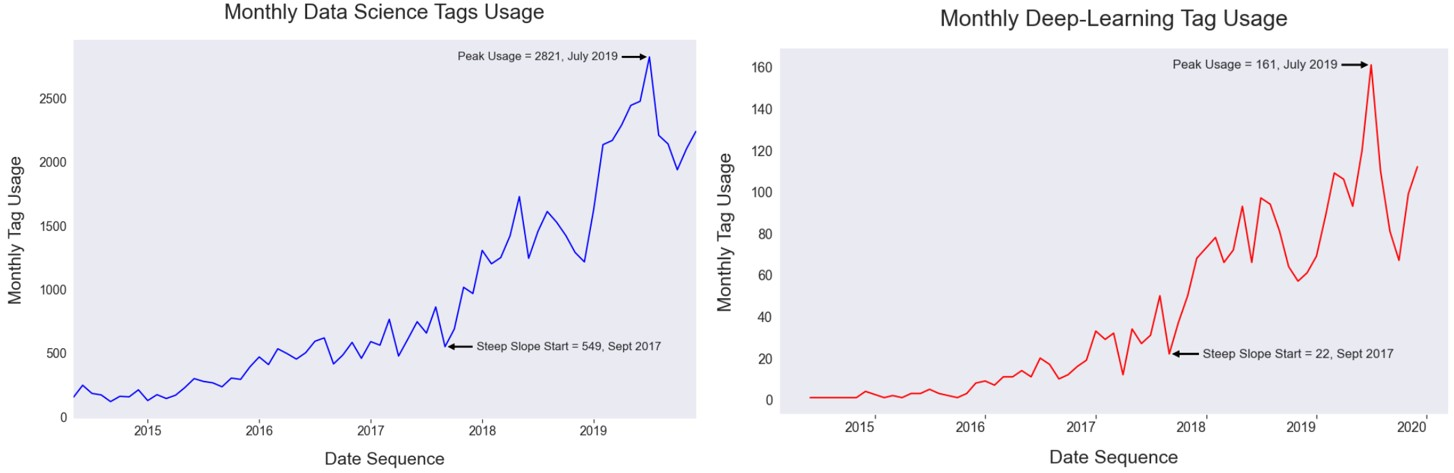

The monthly tag usage curves of the two line graphs above are much the same. The line slope begins to increase at the same time, Sept. 2017 and peaks at the same time, July 2019. I don't think the similarity in the two trends should surprise us since deep-learning is just one segment of Data Science.

If you would like to see the most frequent questions posed within Data Science Stack Exchange, visit the link [here](https://datascience.stackexchange.com/questions?sort=MostFrequent&edited=true, 'here'). I've summarized the current list of top 10 most frequent questions posed as of May 25 2021 (unfiltered across all Tag types). Some of them are not in question format even though they're classed as questions.

1. K-Means clustering for mixed numeric and categorical data.
2. How to set the number of neurons and layers in neural networks.
3. How to get correlation between two categorical variable: a categorical variable and a continuous variable.
4. Does gradient descent always converge to an optimum?
5. How to set class weights for imbalanced classes in Keras.
6. Feature extraction with mobileNet visualization.
7. Why do convolutional neural networks work?
8. Publically Available Datasets.
9. What are deconvolutional layers?
10. Micro Average vs Macro Average Performance in Multiclass Classification setting.
